## Preprocessing Data


In [4]:
import numpy as np
import pandas as pd
# Read the file keeping the original structure
df_raw = pd.read_csv('Data/Participant_1.csv',header=None)

# Display basic info

print(df_raw.head())

C:\Users\ΑΝΘΙΜΟΣ\AppData\Local\Temp\ipykernel_17020\2696252408.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,51,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Data/Participant_1.csv',header=None)


            0         1        2         3        4        5         6   \
0  Left_pocket       NaN      NaN       NaN      NaN      NaN       NaN   
1   time_stamp        Ax       Ay        Az       Lx       Ly        Lz   
2     1.39E+12   -1.8115  -14.873   -1.3484  -1.2691  -5.1057  -0.66445   
3     1.39E+12   0.24517   -14.07  -0.84446  0.70147  -4.2969  -0.17199   
4     1.39E+12  -0.57205  -14.628    -1.757  -0.2176  -4.8531   -1.0565   

         7        8        9   ...       60        61        62       63  \
0       NaN      NaN      NaN  ...      NaN       NaN       NaN      NaN   
1        Gx       Gy       Gz  ...       Lx        Ly        Lz       Gx   
2  -0.53206  -3.1869  0.23976  ...  -5.3574  -0.95749   0.31886  0.52565   
3  -0.25229  -1.7966  0.40745  ...  -4.5352  -0.67629  0.081656  0.43616   
4   -1.0492  0.29138   0.2923  ...  -4.0408  -0.55974  -0.52369  0.32284   

         64       65     66    67    68       69  
0       NaN      NaN    NaN   NaN   NaN  

In [6]:
#folder = 'Data'
# Load the CSV file
file_path = 'Data/Participant_1.csv'

# Load file
raw = pd.read_csv(file_path, header=None, low_memory=False)
data = pd.DataFrame(raw)
# Step 1: Get position name from row 0, col 0 (Choosing Left_pocket)
position_name = raw.iloc[0, 0] 

# Step 2: Extract headers from row 1 (columns 0–12)
column_headers = raw.iloc[1, 0:13].tolist()

# Step 3: Extract data starting from row 2, columns 0–12
main_data = raw.iloc[2:, 0:13].copy()
main_data.columns = column_headers

# Step 4: Append column 69th column as the new 14th column
main_data['activity'] = raw.iloc[2:, 69].values

# Preview
print(main_data.head())



  time_stamp        Ax       Ay        Az        Lx       Ly        Lz  \
2   1.39E+12   -1.8115  -14.873   -1.3484   -1.2691  -5.1057  -0.66445   
3   1.39E+12   0.24517   -14.07  -0.84446   0.70147  -4.2969  -0.17199   
4   1.39E+12  -0.57205  -14.628    -1.757   -0.2176  -4.8531   -1.0565   
5   1.39E+12  -0.69464  -12.939   -3.0918  -0.32273  -3.1786   -2.2197   
6   1.39E+12    0.8717      -12   -1.5663    1.1374   -2.239  -0.65476   

         Gx       Gy       Gz     Mx     My     Mz activity  
2  -0.53206  -3.1869  0.23976  12.72  40.74     -6  walking  
3  -0.25229  -1.7966  0.40745  12.54  40.74  -6.78  walking  
4   -1.0492  0.29138   0.2923  12.42  40.68   -8.1  walking  
5    -2.372   1.0082  0.34972   12.3  40.74  -8.52  walking  
6   -2.7901  0.65485  0.22724  12.24   40.8  -8.88  walking  


In [7]:
from pathlib import Path
assert Path('Data').exists()
#check for missing csv files
filename = []
for i in range(0,10):
    assert Path('Data/Participant_' + str(i+1) + '.csv').exists(), 'File: ' + 'Data/Participant_' + str(i+1) + '.csv' + ' is missing.'
    #keep all filenames in a list
    filename.append('Data/Participant_' + str(i+1) + '.csv')
filename

['Data/Participant_1.csv',
 'Data/Participant_2.csv',
 'Data/Participant_3.csv',
 'Data/Participant_4.csv',
 'Data/Participant_5.csv',
 'Data/Participant_6.csv',
 'Data/Participant_7.csv',
 'Data/Participant_8.csv',
 'Data/Participant_9.csv',
 'Data/Participant_10.csv']

In [8]:
import os

folder = 'Data'
all_data = []

for i in range(1, 11):
    file_path = os.path.join(folder, f'Participant_{i}.csv')
    raw = pd.read_csv(file_path, header= None, low_memory=False)

    # Get position name from row 0 col 0 (LEFT POCKET)
    # #The orientation of the smartphones was portrait.  
    position_name = raw.iloc[0, 0]

    # Extract headers from row 1 columns 0 to 12 refering to Left_Pocket
    column_headers = raw.iloc[1, 0:13].tolist()

    # Extract data from row 2 onwards, columns 0 to 12
    main_data = raw.iloc[2:, 0:13].copy()
    main_data.columns = column_headers

    # Append 69th column (index 69) as extra column
    main_data['activity'] = raw.iloc[2:, 69].values

    # Add participant ID and position as columns for clarity
    main_data['participant'] = i
    main_data['position'] = position_name

    all_data.append(main_data)

# Combine all participant data into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

print(combined_df.sample(5))
print(f'Total rows combined: {combined_df.shape[0]}')



       time_stamp        Ax        Ay       Az        Lx        Ly        Lz  \
179701   1.39E+12    1.3893   -8.9622  -2.5742    1.1391   0.84126   -2.5623   
282869   1.39E+12  -0.92618   -1.0896  -9.3299  0.056922  0.028693   0.36301   
600609   1.39E+12   -1.4982  -0.21793  -9.3844  0.065229  0.018041   0.29392   
380469   1.39E+12    1.5936   -10.951  0.42223   0.31851   -1.2514  -0.26072   
26997    1.39E+12   -6.7693   -17.448   1.1577   -6.4458   -7.9417    3.5458   

                Gx         Gy        Gz     Mx     My      Mz  activity  \
179701     0.83353   -0.69486   0.39951  10.32  54.36   -5.88  upstairs   
282869  -0.0045815   0.007025  0.000611  20.34  -4.32   26.52   sitting   
600609   0.0048869  -0.000611  0.000305  16.32  -8.64   22.44   sitting   
380469     0.99082     2.2901  -0.73395   20.7  22.02  -13.56   walking   
26997       -4.109     2.3531  -0.45082  19.56  34.62   11.94   jogging   

        participant     position  
179701            3  Left_pocket 

In [9]:
all_df_axis = combined_df[['time_stamp','Ax','Ay','Az','participant', 'activity']].copy()
# Convert to numpy array
all_df_axis['activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs', 'upsatirs'], dtype=object)

In [10]:
all_df_axis.loc[all_df_axis['activity'] == 'upsatirs', 'activity'] = 'upstairs'
all_df_axis.sample(5)

,time_stamp,Ax,Ay,Az,participant,activity
51703,1.39E+12,0.39499,-5.598,-3.1054,1,upstairs
479646,1.39E+12,-2.3427,-8.3493,-7.7227,8,biking
408512,1.39E+12,-1.1577,-2.0431,-9.112,7,sitting
31919,1.39E+12,2.8875,-1.1441,-9.0303,1,sitting
530134,1.39E+12,10.351,1.5936,1.6208,9,jogging


In [11]:
cols_to_numeric = ['Ax', 'Ay', 'Az', 'time_stamp']
for col in cols_to_numeric:
    all_df_axis[col] = pd.to_numeric(all_df_axis[col], errors='coerce')
all_df_axis['participant'] = all_df_axis['participant'].astype('category')
all_df_axis['activity'] = all_df_axis['activity'].astype('category')

In [154]:
all_df_axis.describe()

,time_stamp,Ax,Ay,Az
count,6.300000e+05,630000.000000,630000.000000,630000.000000
mean,1.390000e+12,0.122884,-7.579559,-2.807124
std,0.000000e+00,3.775908,5.684442,4.587958
min,1.390000e+12,-19.477000,-19.668000,-19.409000
25%,1.390000e+12,-1.416500,-10.447000,-6.633100
50%,1.390000e+12,0.449470,-8.648900,-2.070300
75%,1.390000e+12,2.261000,-2.764900,0.544810
max,1.390000e+12,19.477000,18.864000,19.355000


In [12]:
data = all_df_axis.copy()
data

,time_stamp,Ax,Ay,Az,participant,activity
0,1.390000e+12,-1.81150,-14.873,-1.348400,1,walking
1,1.390000e+12,0.24517,-14.070,-0.844460,1,walking
2,1.390000e+12,-0.57205,-14.628,-1.757000,1,walking
3,1.390000e+12,-0.69464,-12.939,-3.091800,1,walking
4,1.390000e+12,0.87170,-12.000,-1.566300,1,walking
...,...,...,...,...,...,...
629995,1.390000e+12,4.23590,-11.700,-2.301800,10,downstairs
629996,1.390000e+12,3.89540,-11.795,-3.500400,10,downstairs
629997,1.390000e+12,2.90110,-12.149,-3.187200,10,downstairs
629998,1.390000e+12,2.42440,-11.496,-1.947700,10,downstairs


In [156]:
for i in range(1, len(data['participant'].unique())+1):
    print(f'Participant {i} has {len(data[data["participant"] == i])} rows')

Participant 1 has 63000 rows
Participant 2 has 63000 rows
Participant 3 has 63000 rows
Participant 4 has 63000 rows
Participant 5 has 63000 rows
Participant 6 has 63000 rows
Participant 7 has 63000 rows
Participant 8 has 63000 rows
Participant 9 has 63000 rows
Participant 10 has 63000 rows


## Exploration of distributions
Keep in mind: 10 participants, all of them doing all 7 activities.

About 3-4 minutes every activity.

Sampling rate: 50 samples per second (Hz).

We picked left pocket position.

Orientation of phone was portrait.

In [13]:
data.groupby(["activity"]).describe()

C:\Users\ΑΝΘΙΜΟΣ\AppData\Local\Temp\ipykernel_17020\1595648991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["activity"]).describe()


time_stamp                                                 \
                count          mean  std           min           25%   
activity                                                               
biking        90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
downstairs    90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
jogging       90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
sitting       90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
standing      90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
upstairs      90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   
walking       90000.0  1.390000e+12  0.0  1.390000e+12  1.390000e+12   

                                                           Ax            ...  \
                     50%           75%           max    count      mean  ...   
activity                                                                 ...   
biking      1.390000e+12  1.390000e+12  1.390000e+12  90000.0 -0.965437  ...   
downstairs  1.390000e+12  1.390000e+12  1.390000e+12  90000.0  0.464903  ...   
jogging     1.390000e+12  1.390000e+12  1.390000e+12  90000.0  0.412141  ...   
sitting     1.390000e+12  1.390000e+12  1.390000e+12  90000.0 -1.381748  ...   
standing    1.390000e+12  1.390000e+12  1.390000e+12  90000.0  0.813586  ...   
upstairs    1.390000e+12  1.390000e+12  1.390000e+12  90000.0  0.718171  ...   
walking     1.390000e+12  1.390000e+12  1.390000e+12  90000.0  0.798570  ...   

                 Ay                Az                                        \
                75%      max    count      mean       std      min      25%   
activity                                                                      
biking     -2.22010   8.7579  90000.0 -6.464210  1.936391 -18.8910 -7.70910   
downstairs -6.79660  12.4080  90000.0 -1.703549  3.433827 -19.1640 -3.51400   
jogging    -1.93070  18.8640  90000.0 -0.652393  5.807316 -19.2460 -4.08610   
sitting     0.64016   3.1872  90000.0 -8.818596  0.872303 -15.6360 -9.34360   
standing   -9.83390  -5.3800  90000.0  0.061165  1.589172  -4.9987 -0.24517   
upstairs   -6.93280  12.4490  90000.0 -1.726161  2.931823 -19.1500 -2.86030   
walking    -7.28690  11.7540  90000.0 -0.346126  3.920919 -19.4090 -1.45740   

                                       
                50%      75%      max  
activity                               
biking     -6.70120 -5.47540   5.1213  
downstairs -1.52550  0.24517  18.0610  
jogging    -0.66740  2.43800  19.3550  
sitting    -9.20740 -8.52630  -3.3778  
standing    0.81722  1.17130   4.0997  
upstairs   -1.40290 -0.17706  16.4810  
walking     0.24517  1.72980  15.7590  

[7 rows x 32 columns]

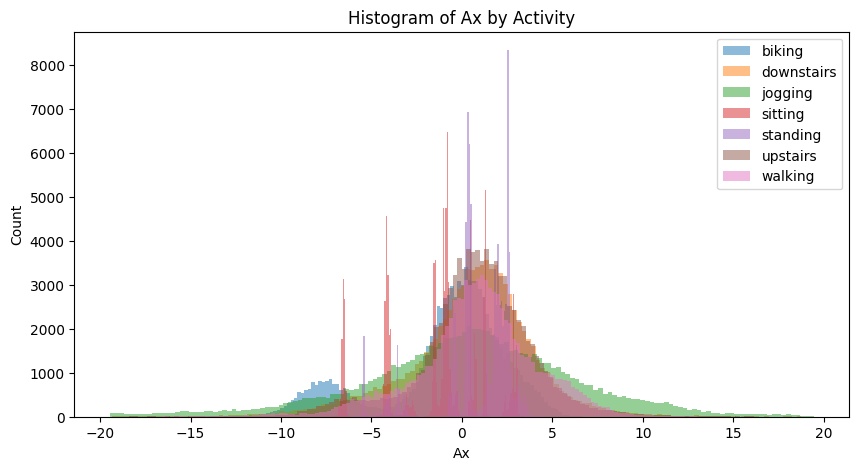

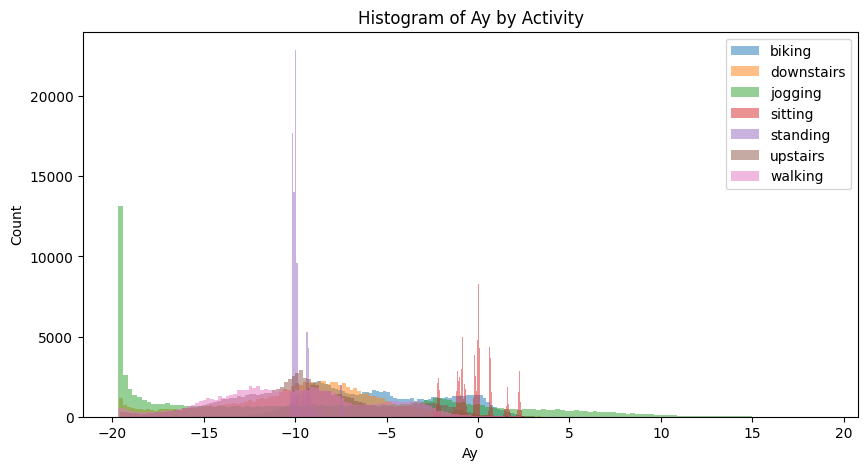

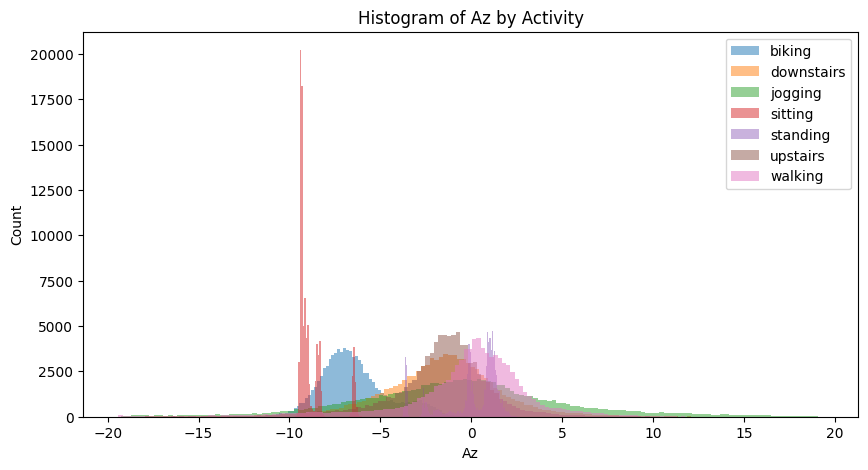

In [14]:
import matplotlib.pyplot as plt

for axis in ['Ax', 'Ay', 'Az']:
    plt.figure(figsize=(10, 5))
    for activity in data['activity'].cat.categories:
        subset = data[data['activity'] == activity]
        plt.hist(subset[axis], bins=150, alpha=0.5, label=str(activity))
    plt.title(f'Histogram of {axis} by Activity')
    plt.xlabel(axis)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Clear Indications of specific activities 
similar effect of sitting and standing if we take the magnidute of Ax,Ay,Az

Az: close to 9.8m/s^2 ----------- sitting 

Ay: close to 9.8m/s^2 ----------- standing

Ay: -20m/s^2 ------------------- jogging


In [15]:

print(f'Each Participant has {(63000/50)/60} minutes total time of all activities. {9000/50} seconds each activity')

Each Participant has 21.0 minutes total time of all activities. 180.0 seconds each activity


In [16]:
for pid in data['participant'].cat.categories:
    counts = data[data['participant'] == pid]['activity'].value_counts()
    print(f'Participant {pid}:')
    print(counts)
    print('-' * 30)

Participant 1:
activity
biking        9000
downstairs    9000
jogging       9000
sitting       9000
standing      9000
upstairs      9000
walking       9000
Name: count, dtype: int64
------------------------------
Participant 2:
activity
biking        9000
downstairs    9000
jogging       9000
sitting       9000
standing      9000
upstairs      9000
walking       9000
Name: count, dtype: int64
------------------------------
Participant 3:
activity
biking        9000
downstairs    9000
jogging       9000
sitting       9000
standing      9000
upstairs      9000
walking       9000
Name: count, dtype: int64
------------------------------
Participant 4:
activity
biking        9000
downstairs    9000
jogging       9000
sitting       9000
standing      9000
upstairs      9000
walking       9000
Name: count, dtype: int64
------------------------------
Participant 5:
activity
biking        9000
downstairs    9000
jogging       9000
sitting       9000
standing      9000
upstairs      9000
walkin

In [17]:
# Create a new column with the cumulative time (just for exploratory reasons)
#data['time_absolute'] = data['time_stamp'].cumsum()

# Better View of our Signal

- plot Ax, Ay, Az per second indicate different activity
- Accel. Magnitude per second indicate different activity

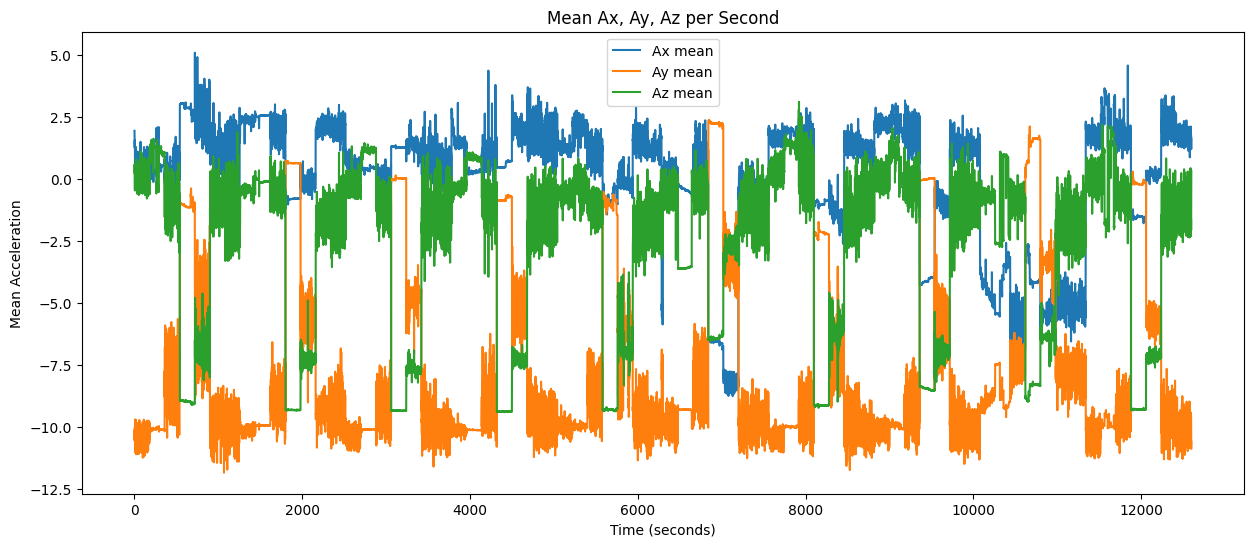

In [18]:
import matplotlib.pyplot as plt

# Create a group index for every 50 samples
data['group'] = (np.arange(len(data)) // 50)

# Calculate mean for each group
mean_df = data.groupby('group')[['Ax', 'Ay', 'Az']].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(mean_df['group'], mean_df['Ax'], label='Ax mean')
plt.plot(mean_df['group'], mean_df['Ay'], label='Ay mean')
plt.plot(mean_df['group'], mean_df['Az'], label='Az mean')
plt.xlabel('Time (seconds)')
plt.ylabel('Mean Acceleration')
plt.title('Mean Ax, Ay, Az per Second')
plt.legend()
plt.show()

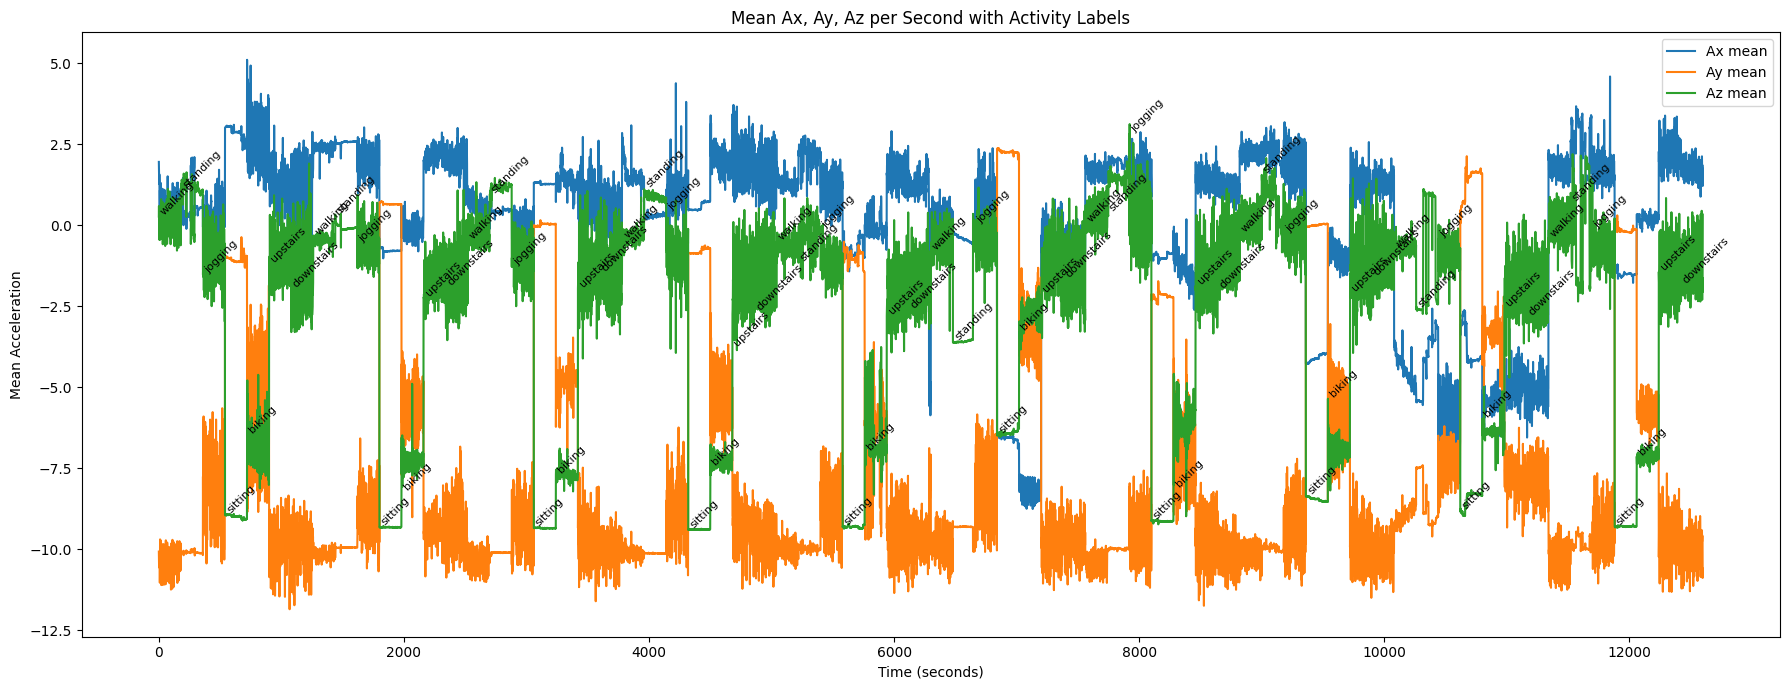

In [19]:
# Create a group index for every 50 samples (1 second)
data['group'] = (np.arange(len(data)) // 50)

# Calculate mean for each group
mean_df = data.groupby('group')[['Ax', 'Ay', 'Az']].mean().reset_index()

# Find the most frequent activity in each group
activity_labels = data.groupby('group')['activity'].agg(lambda x: x.mode()[0]).reset_index()
mean_df['activity'] = activity_labels['activity']

plt.figure(figsize=(18, 7))
plt.plot(mean_df['group'], mean_df['Ax'], label='Ax mean')
plt.plot(mean_df['group'], mean_df['Ay'], label='Ay mean')
plt.plot(mean_df['group'], mean_df['Az'], label='Az mean')

# Annotate activity label every 180 seconds for clarity
for idx, row in mean_df.iloc[::180].iterrows():
    plt.text(row['group'], row['Az'], str(row['activity']), rotation=45, fontsize=8, ha='left', va='bottom')

plt.xlabel('Time (seconds)')
plt.ylabel('Mean Acceleration')
plt.title('Mean Ax, Ay, Az per Second with Activity Labels')
plt.legend()
plt.tight_layout()
plt.show()

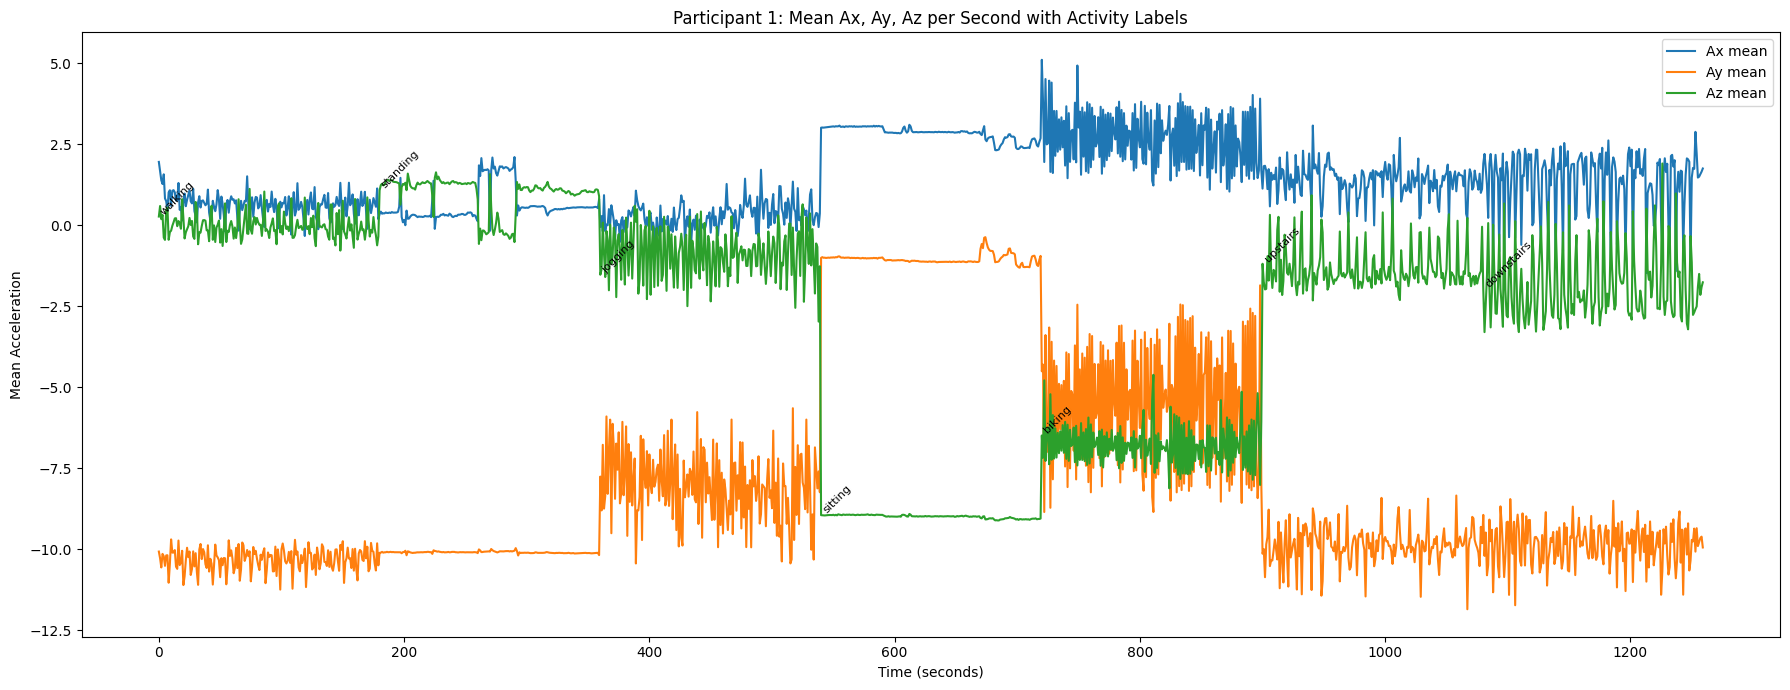

In [20]:


# Filter for participant 1
participant_1_data = data[data['participant'] == 1].reset_index(drop=True)

# Create a group index for every 50 samples (1 second)
participant_1_data['group'] = (np.arange(len(participant_1_data)) // 50)

# Calculate mean for each group
mean_df = participant_1_data.groupby('group')[['Ax', 'Ay', 'Az']].mean().reset_index()

# Find the most frequent activity in each group
activity_labels = participant_1_data.groupby('group')['activity'].agg(lambda x: x.mode()[0]).reset_index()
mean_df['activity'] = activity_labels['activity']

plt.figure(figsize=(18, 7))
plt.plot(mean_df['group'], mean_df['Ax'], label='Ax mean')
plt.plot(mean_df['group'], mean_df['Ay'], label='Ay mean')
plt.plot(mean_df['group'], mean_df['Az'], label='Az mean')

# Annotate activity label every 180 seconds for clarity
for idx, row in mean_df.iloc[::180].iterrows():
    plt.text(row['group'], row['Az'], str(row['activity']), rotation=45, fontsize=8, ha='left', va='bottom')

plt.xlabel('Time (seconds)')
plt.ylabel('Mean Acceleration')
plt.title('Participant 1: Mean Ax, Ay, Az per Second with Activity Labels')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# We will deal with it after the standard design of the assignment.
# Vectorize the Ax, Ay, Az columns to create a new column 'accel_vector' for further analysis if needed
data['accel_vector'] = data[['Ax', 'Ay', 'Az']].apply(lambda row: np.array([row['Ax'], row['Ay'], row['Az']]), axis=1)

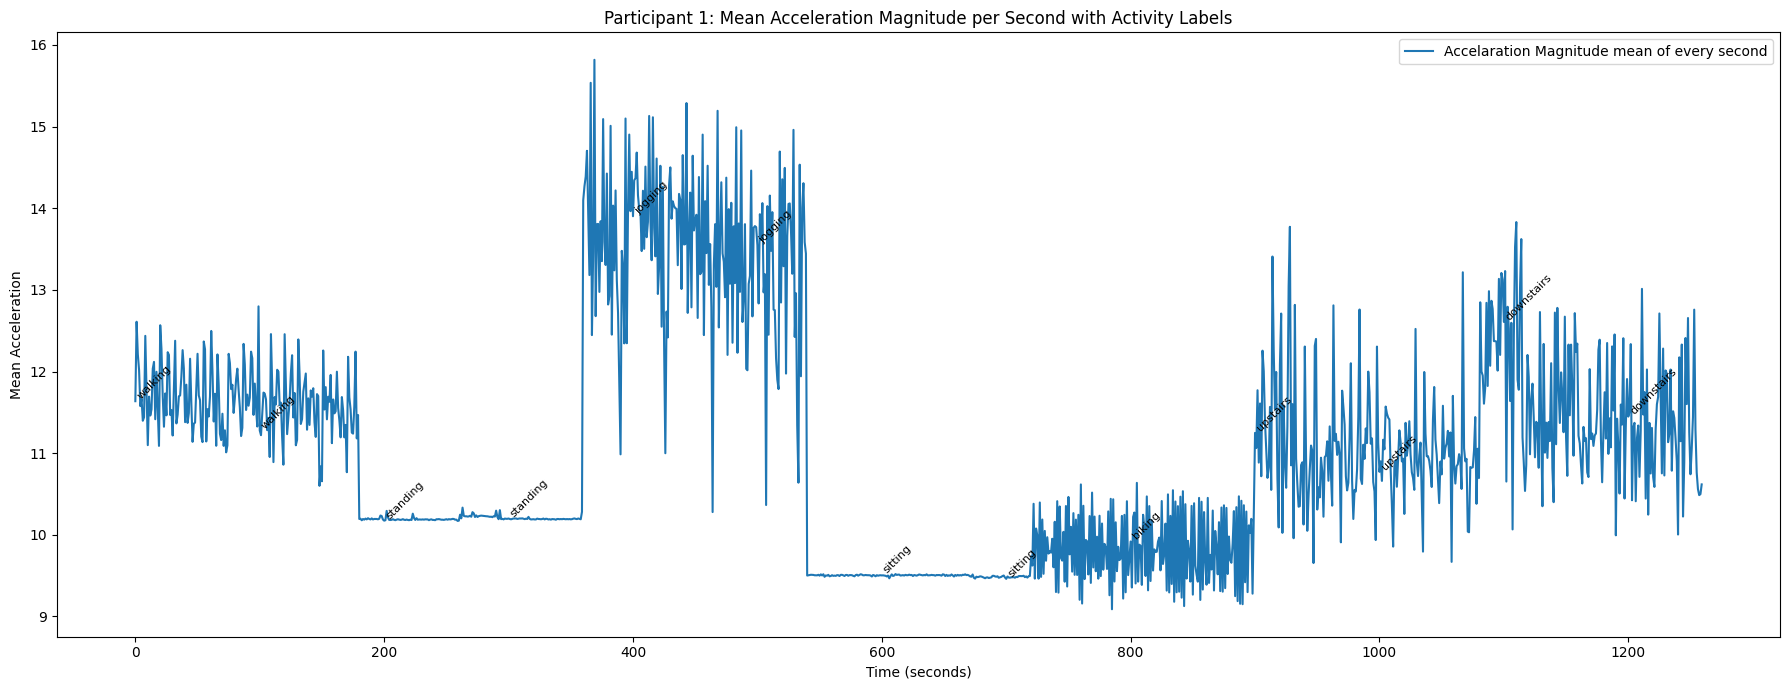

In [22]:
data['accel_magnitude'] = np.sqrt(data['Ax']**2 + data['Ay']**2 + data['Az']**2)
import matplotlib.pyplot as plt

# Filter for participant 1
participant_1_data = data[data['participant'] == 1].reset_index(drop=True)

# Create a group index for every 50 samples (1 second)
participant_1_data['group'] = (np.arange(len(participant_1_data)) // 50)

# Calculate mean for each group
mean_df = participant_1_data.groupby('group')[['accel_magnitude']].mean().reset_index()

# Find the most frequent activity in each group
activity_labels = participant_1_data.groupby('group')['activity'].agg(lambda x: x.mode()[0]).reset_index()
mean_df['activity'] = activity_labels['activity']

plt.figure(figsize=(18, 7))
plt.plot(mean_df['group'], mean_df['accel_magnitude'], label='Accelaration Magnitude mean of every second')

# Annotate activity label every 180 seconds for clarity
for idx, row in mean_df.iloc[::100].iterrows():
    plt.text(row['group'], row['accel_magnitude'], str(row['activity']), rotation=45, fontsize=8, ha='left', va='bottom')

plt.xlabel('Time (seconds)')
plt.ylabel('Mean Acceleration')
plt.title('Participant 1: Mean Acceleration Magnitude per Second with Activity Labels')
plt.legend()
plt.tight_layout()
plt.show()

# Filtering Accel. Magnitude
Values above 1000 as wrong registries and replace them with previous nearby values

In [23]:
data['accel_magnitude'].describe() # it does not have any outliers


count    630000.000000
mean         10.806944
std           4.021737
min           0.136880
25%           9.143587
50%          10.074256
75%          12.033705
max          32.642913
Name: accel_magnitude, dtype: float64

In [24]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [26]:
import numpy as np

def replace_sensor_errors(data, threshold=1000):
    data = np.array(data, dtype=float)
    n = data.shape[0]

    # Find indices where data > threshold
    error_idx = np.where(data > threshold)[0] # to get the actual indices array from the tuple returned by np.where.

    # Handle the first element if it's an error
    if 0 in error_idx:
        valid_idx = np.where(data <= threshold)[0]
        if valid_idx.size == 0:
            raise ValueError("All values in this dataset are errors")
        data[0] = data[valid_idx[0]]

    # For the rest, replace with previous valid value
    for i in error_idx:
        if i == 0:
            continue
        data[i] = data[i-1]

    return data

# Apply only to the accel_magnitude column
data['accel_magnitude'] = replace_sensor_errors(data['accel_magnitude'].values)

In [27]:
# raw data before feature extraction and window building
data['accel_magnitude'].groupby(data['activity']).describe() 


C:\Users\ΑΝΘΙΜΟΣ\AppData\Local\Temp\ipykernel_17020\1947727602.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['accel_magnitude'].groupby(data['activity']).describe()


,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
biking,90000.0,9.752656,2.150738,1.099792,8.306188,9.856553,11.071846,25.455846
downstairs,90000.0,10.936123,4.421043,0.386204,7.964600,10.168556,13.419852,31.968675
jogging,90000.0,13.438050,6.566605,0.136880,7.666610,13.191185,19.583183,32.642913
sitting,90000.0,9.433603,0.081588,4.221222,9.398483,9.433411,9.467846,15.932812
standing,90000.0,10.174124,0.209247,6.160655,10.148907,10.218428,10.277152,18.484682
upstairs,90000.0,10.641840,3.938167,0.542422,8.179272,10.292937,13.125663,29.597370
walking,90000.0,11.272214,4.448497,0.288931,8.290367,10.984681,13.958664,30.089941


In [28]:
combined_df.sample(5) # with the other metrics
data.columns
# Group Column is like a time window of 1 second,
# we will leave it out, because we will use a sliding window of 20 seconds.


Index(['time_stamp', 'Ax', 'Ay', 'Az', 'participant', 'activity', 'group',
       'accel_vector', 'accel_magnitude'],
      dtype='object')

In [29]:
# Keep the essential columns
data_needed = data[['time_stamp','participant','activity','accel_magnitude']].copy()

In [30]:
# Save the cleaned and processed data to a new CSV file
output_file_path = 'Data/preprocessed_data.csv'
data_needed.to_csv(output_file_path, index=False)

## Creating Time Window
Info:

- window size: 20 sec
- sliding step : 1 sec = 50 Hz
- overlapping windows
- size: 1000samples = 20 seconds * 50 Hz  
- every participant has 63000 samples
- each window does

In [31]:
window_size = 1000   # 20 seconds * 50 Hz
step_size = 50       # 1 second * 50 Hz

participant_1_data = data[data['participant'] == 1].reset_index(drop=True)
windows = []

for start in range(0, len(participant_1_data) - window_size + 1, step_size):
    end = start + window_size
    window = participant_1_data.iloc[start:end]
    windows.append(window)

print(f"Total windows for participant 1: {len(windows)}")

Total windows for participant 1: 1241
